## Car Price Prediction

#### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

#### Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [432]:
import warnings
warnings.filterwarnings('ignore')

In [433]:
pd.options.display.max_columns=None

In [434]:
cars=pd.read_csv('CarPrice_Assignment.csv')
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [435]:
cars.shape

(205, 26)

In [436]:
cars.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [437]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [438]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### EDA

### Target variable

In [439]:
cars.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [440]:
plt.hist(cars.price,color='red')
plt.show()

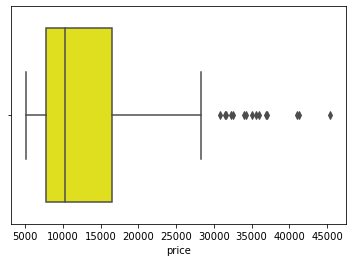

In [441]:
sns.boxplot(cars.price,color='yellow')
plt.show()

In [442]:
iqr=cars.price.describe()['75%']-cars.price.describe()['25%']
ul=1.5*iqr + cars.price.describe()['75%']
print(ul)

29575.5


In [443]:
len(cars.price[cars.price>ul])

15

In [444]:
#Checking for duplicates
cars.loc[cars.duplicated()]

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

In [445]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [446]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price,color='green')

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price,color='red')

plt.show()

### CarName

In [447]:
cars.CarName.value_counts()

toyota corolla              6
peugeot 504                 6
toyota corona               6
subaru dl                   4
mitsubishi outlander        3
                           ..
honda accord cvcc           1
jaguar xk                   1
maxda glc deluxe            1
buick century luxus (sw)    1
plymouth cricket            1
Name: CarName, Length: 147, dtype: int64

It will be better if we can extract the company names and create a seperate varibale

In [448]:
CompanyName=cars['CarName'].apply(lambda x:x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

In [449]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There seems to be some spelling error in the CompanyName column.

maxda = mazda

Nissan = nissan

porsche = porcshce

toyota = toyouta

vokswagen = volkswagen = vw

In [450]:
cars.CompanyName = cars.CompanyName.str.lower()

In [451]:
def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

In [452]:
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [453]:
cars.loc[cars.duplicated()]

Empty DataFrame
Columns: [car_ID, symboling, CompanyName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

### Visualizing categorical data

In [454]:
cars.select_dtypes(include=object).columns

Index(['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [455]:
plt.figure(figsize=(20,8))
sns.countplot(cars.CompanyName)
plt.show()

In [456]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,2,2)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

In [457]:
cars.groupby('carbody')['price'].mean()

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64

In [458]:
cars.groupby('fueltype')['price'].mean()

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64

Inference :

1.Toyota seemed to be favored car company.

2.Number of gas fueled cars are more than diesel.

3.sedan is the top car type prefered.

4.Hardtops and convertibles cost more than other types.

5.Deisel vehicles cost more.

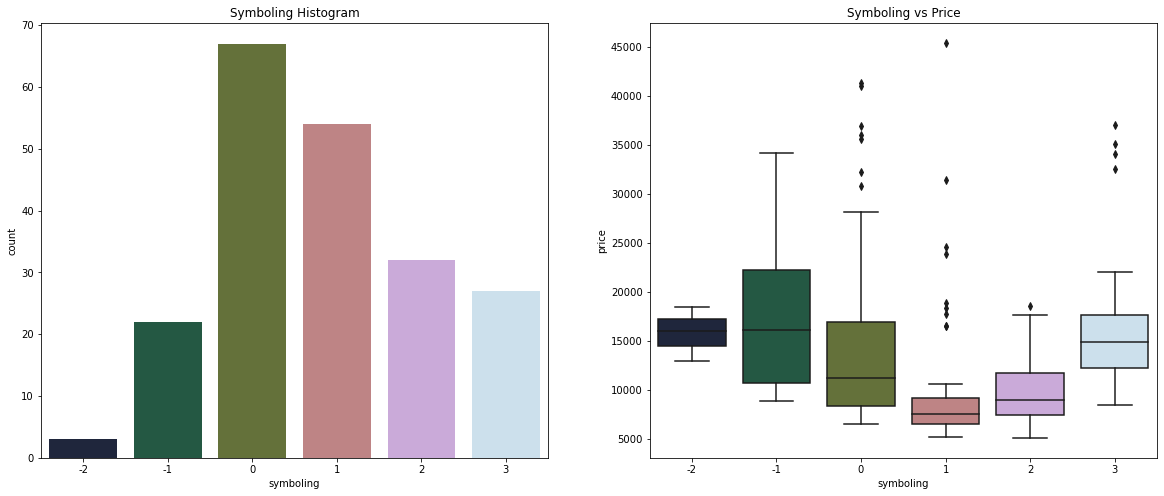

In [459]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

In [460]:
cars.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [461]:
cars.groupby('symboling')['price'].mean()

symboling
-2    15781.666667
-1    17330.681818
 0    14366.965179
 1    10037.907407
 2    10109.281250
 3    17221.296296
Name: price, dtype: float64

<AxesSubplot:xlabel='symboling'>

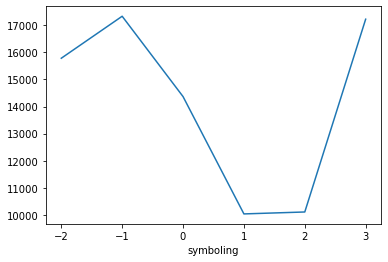

In [462]:
cars.groupby('symboling')['price'].mean().plot()

Inference :

1.It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)

2.The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good).
But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

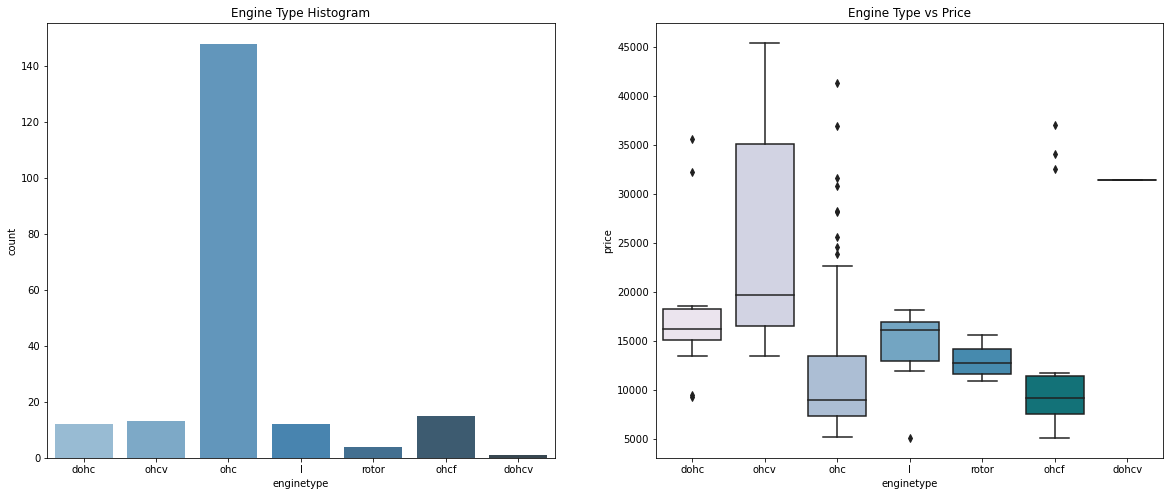

In [463]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

In [464]:
cars.groupby('enginetype')['price'].mean()

enginetype
dohc     18116.416667
dohcv    31400.500000
l        14627.583333
ohc      11574.048426
ohcf     13738.600000
ohcv     25098.384615
rotor    13020.000000
Name: price, dtype: float64

In [465]:
cars.groupby('enginetype')['price'].count()

enginetype
dohc      12
dohcv      1
l         12
ohc      148
ohcf      15
ohcv      13
rotor      4
Name: price, dtype: int64

Inference :

1.ohc Engine type seems to be most favored type.

2.ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<Figure size 2160x504 with 0 Axes>

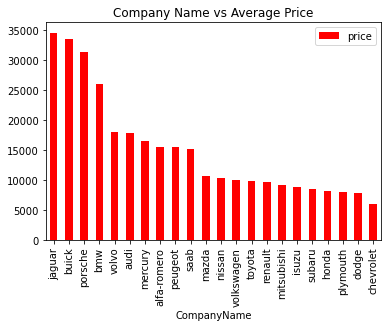

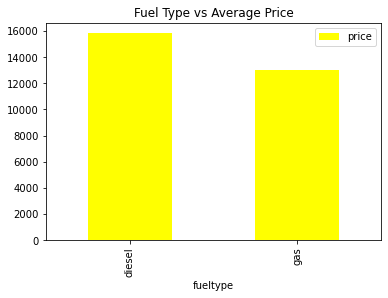

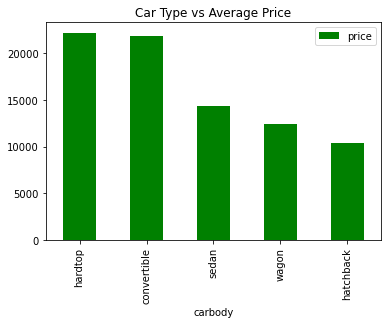

In [466]:
plt.figure(figsize=(30, 7))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar(color='red')
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(color='yellow')
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar(color='green')
plt.title('Car Type vs Average Price')
plt.show()

Inference :
    
1.Jaguar and Buick seem to have highest average price.

2.Diesel has higher average price than gas.

3.Hardtop and convertible have higher average price.

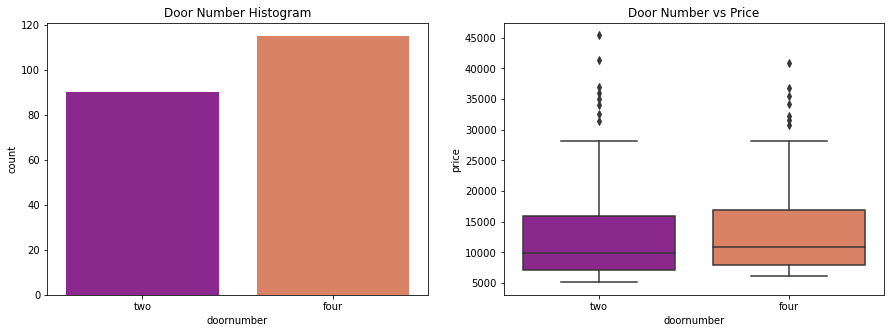

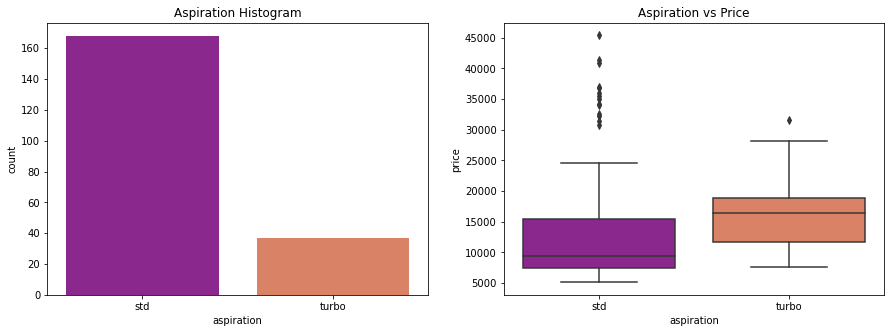

In [467]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()

In [468]:
cars.groupby('doornumber')['price'].describe()

count          mean          std     min     25%      50%  \
doornumber                                                              
four        115.0  13501.152174  7338.296321  6229.0  8006.0  10898.0   
two          90.0  12989.924078  8784.227805  5118.0  7171.5   9927.0   

                 75%      max  
doornumber                     
four        16872.50  40960.0  
two         15909.75  45400.0

In [469]:
cars.groupby('aspiration')['price'].describe()

count          mean          std     min      25%      50%  \
aspiration                                                               
std         168.0  12611.270833  8214.342183  5118.0   7446.0   9418.0   
turbo        37.0  16298.166676  6098.889385  7689.0  11694.0  16503.0   

                75%      max  
aspiration                    
std         15527.5  45400.0  
turbo       18950.0  31600.0

Inference :
    
1.doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.

2.It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

In [470]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

Inference :

1.Very few datapoints for enginelocation categories to make an inference.

2.Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.

3.mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference.

4.A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

#### Visualizing numerical data

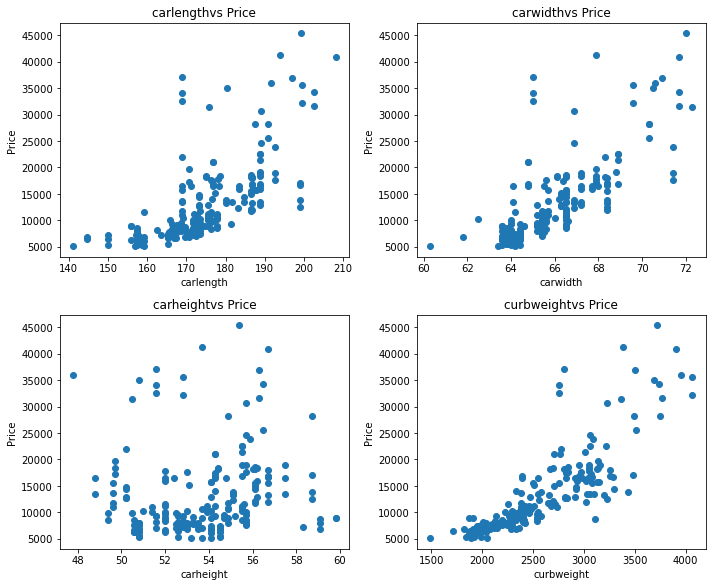

In [471]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+'vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)
    
plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

Inference :

1.carwidth, carlength and curbweight seems to have a poitive correlation with price.

2.carheight doesn't show any significant trend with price.

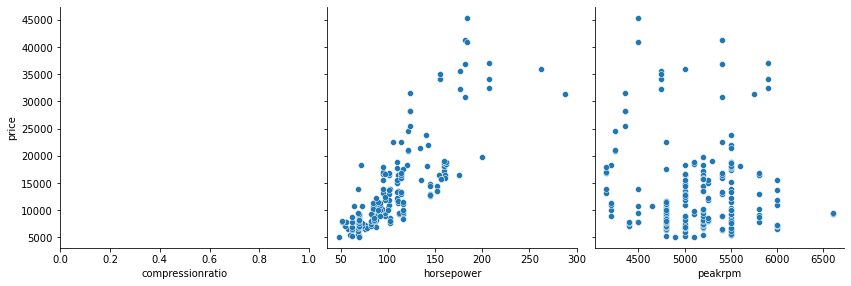

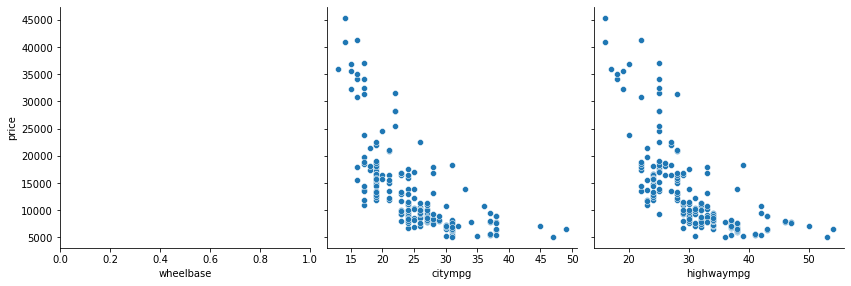

In [472]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',height=4, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

In [473]:
np.corrcoef(cars['carlength'], cars['carwidth'])

array([[1.        , 0.84111827],
       [0.84111827, 1.        ]])

#### Feature Engg

In [474]:
#Fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [475]:
#Binning the Car Companies based on avg prices of each Company.
cars.price=cars.price.astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
temp

car_ID  symboling  CompanyName fueltype aspiration doornumber  \
0         1          3  alfa-romero      gas        std        two   
1         2          3  alfa-romero      gas        std        two   
2         3          1  alfa-romero      gas        std        two   
3         4          2         audi      gas        std       four   
4         5          2         audi      gas        std       four   
..      ...        ...          ...      ...        ...        ...   
200     201         -1        volvo      gas        std       four   
201     202         -1        volvo      gas      turbo       four   
202     203         -1        volvo      gas        std       four   
203     204         -1        volvo   diesel      turbo       four   
204     205         -1        volvo      gas      turbo       four   

         carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0    convertible        rwd          front       88.6      168.8      64.1   
1    convertible        rwd          front       88.6      168.8      64.1   
2      hatchback        rwd          front       94.5      171.2      65.5   
3          sedan        fwd          front       99.8      176.6      66.2   
4          sedan        4wd          front       99.4      176.6      66.4   
..           ...        ...            ...        ...        ...       ...   
200        sedan        rwd          front      109.1      188.8      68.9   
201        sedan        rwd          front      109.1      188.8      68.8   
202        sedan        rwd          front      109.1      188.8      68.9   
203        sedan        rwd          front      109.1      188.8      68.9   
204        sedan        rwd          front      109.1      188.8      68.9   

     carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0         48.8        2548       dohc           four         130       mpfi   
1         48.8        2548       dohc           four         130       mpfi   
2         52.4        2823       ohcv            six         152       mpfi   
3         54.3        2337        ohc           four         109       mpfi   
4         54.3        2824        ohc           five         136       mpfi   
..         ...         ...        ...            ...         ...        ...   
200       55.5        2952        ohc           four         141       mpfi   
201       55.5        3049        ohc           four         141       mpfi   
202       55.5        3012       ohcv            six         173       mpfi   
203       55.5        3217        ohc            six         145        idi   
204       55.5        3062        ohc           four         141       mpfi   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0         3.47    2.68               9.0         111     5000       21   
1         3.47    2.68               9.0         111     5000       21   
2         2.68    3.47               9.0         154     5000       19   
3         3.19    3.40              10.0         102     5500       24   
4         3.19    3.40               8.0         115     5500       18   
..         ...     ...               ...         ...      ...      ...   
200       3.78    3.15               9.5         114     5400       23   
201       3.78    3.15               8.7         160     5300       19   
202       3.58    2.87               8.8         134     5500       18   
203       3.01    3.40              23.0         106     4800       26   
204       3.78    3.15               9.5         114     5400       19   

     highwaympg  price_x  fueleconomy       price_y  
0            27    13495        23.70  15498.333333  
1            27    16500        23.70  15498.333333  
2            26    16500        22.15  15498.333333  
3            30    13950        26.70  17859.142857  
4            22    17450        19.80  17859.142857  
..          ...      ...          ...           ...  
200        

In [476]:
table

CompanyName
alfa-romero    15498.333333
audi           17859.142857
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.250000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.400000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [477]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  \
0    2.68               9.0         111     5000       21          27  13495   
1    2.68               9.0         111     5000       21          27  16500   
2    3.47               9.0         154     5000       19          26  16500   
3    3.40              10.0         102     5500       24          30  13950   
4    3.40               8.0         115     5500       18          22  17450   

   fueleconomy carsrange  
0        23.70    Medium  
1        23.70    Medium  
2        22.15    Medium  
3        26.70    Medium  
4        19.80    Medium

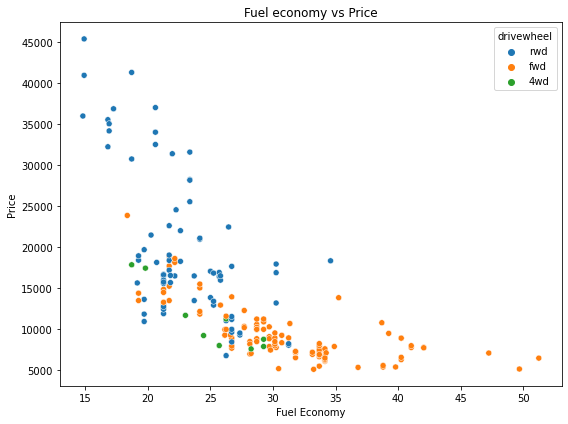

In [478]:
#Fuel Economy
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

Inference :

1.fueleconomy has a negative correlation with price.

In [479]:
cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean()

fuelsystem  drivewheel  carsrange
1bbl        4wd         Budget                NaN
                        Medium                NaN
                        Highend               NaN
            fwd         Budget        7555.545455
                        Medium                NaN
                                         ...     
spfi        fwd         Medium                NaN
                        Highend               NaN
            rwd         Budget       11048.000000
                        Medium                NaN
                        Highend               NaN
Name: price, Length: 72, dtype: float64

In [480]:
cars.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [481]:
cars.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [482]:
cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0)

carsrange                    Budget        Medium  Highend
fuelsystem drivewheel                                     
1bbl       4wd                  NaN           NaN      NaN
           fwd          7555.545455           NaN      NaN
           rwd                  NaN           NaN      NaN
2bbl       4wd          8305.000000           NaN      NaN
           fwd          7126.000000   7870.904762      NaN
           rwd          7693.666667           NaN      NaN
4bbl       4wd                  NaN           NaN      NaN
           fwd                  NaN           NaN      NaN
           rwd                  NaN  12145.000000      NaN
idi        4wd                  NaN           NaN      NaN
           fwd          8794.666667   9500.666667      NaN
           rwd                  NaN  17114.142857  28394.0
mfi        4wd                  NaN           NaN      NaN
           fwd         12964.000000           NaN      NaN
           rwd                  NaN           NaN      NaN
mpfi       4wd         11476.500000  17654.500000      NaN
           fwd          9990.000000  13830.090909      NaN
           rwd         12610.500000  16793.600000  31267.6
spdi       4wd                  NaN           NaN      NaN
           fwd         10768.750000           NaN      NaN
           rwd         12764.000000           NaN      NaN
spfi       4wd                  NaN           NaN      NaN
           fwd                  NaN           NaN      NaN
           rwd         11048.000000           NaN      NaN

<Figure size 1800x432 with 0 Axes>

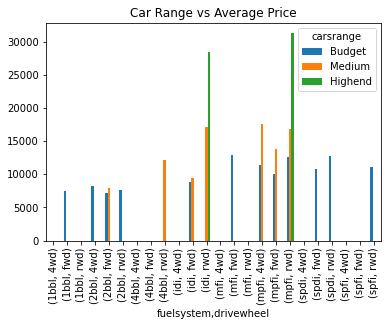

In [483]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

Inference :

1.High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.


#### Testing

In [484]:
cars.shape

(205, 28)

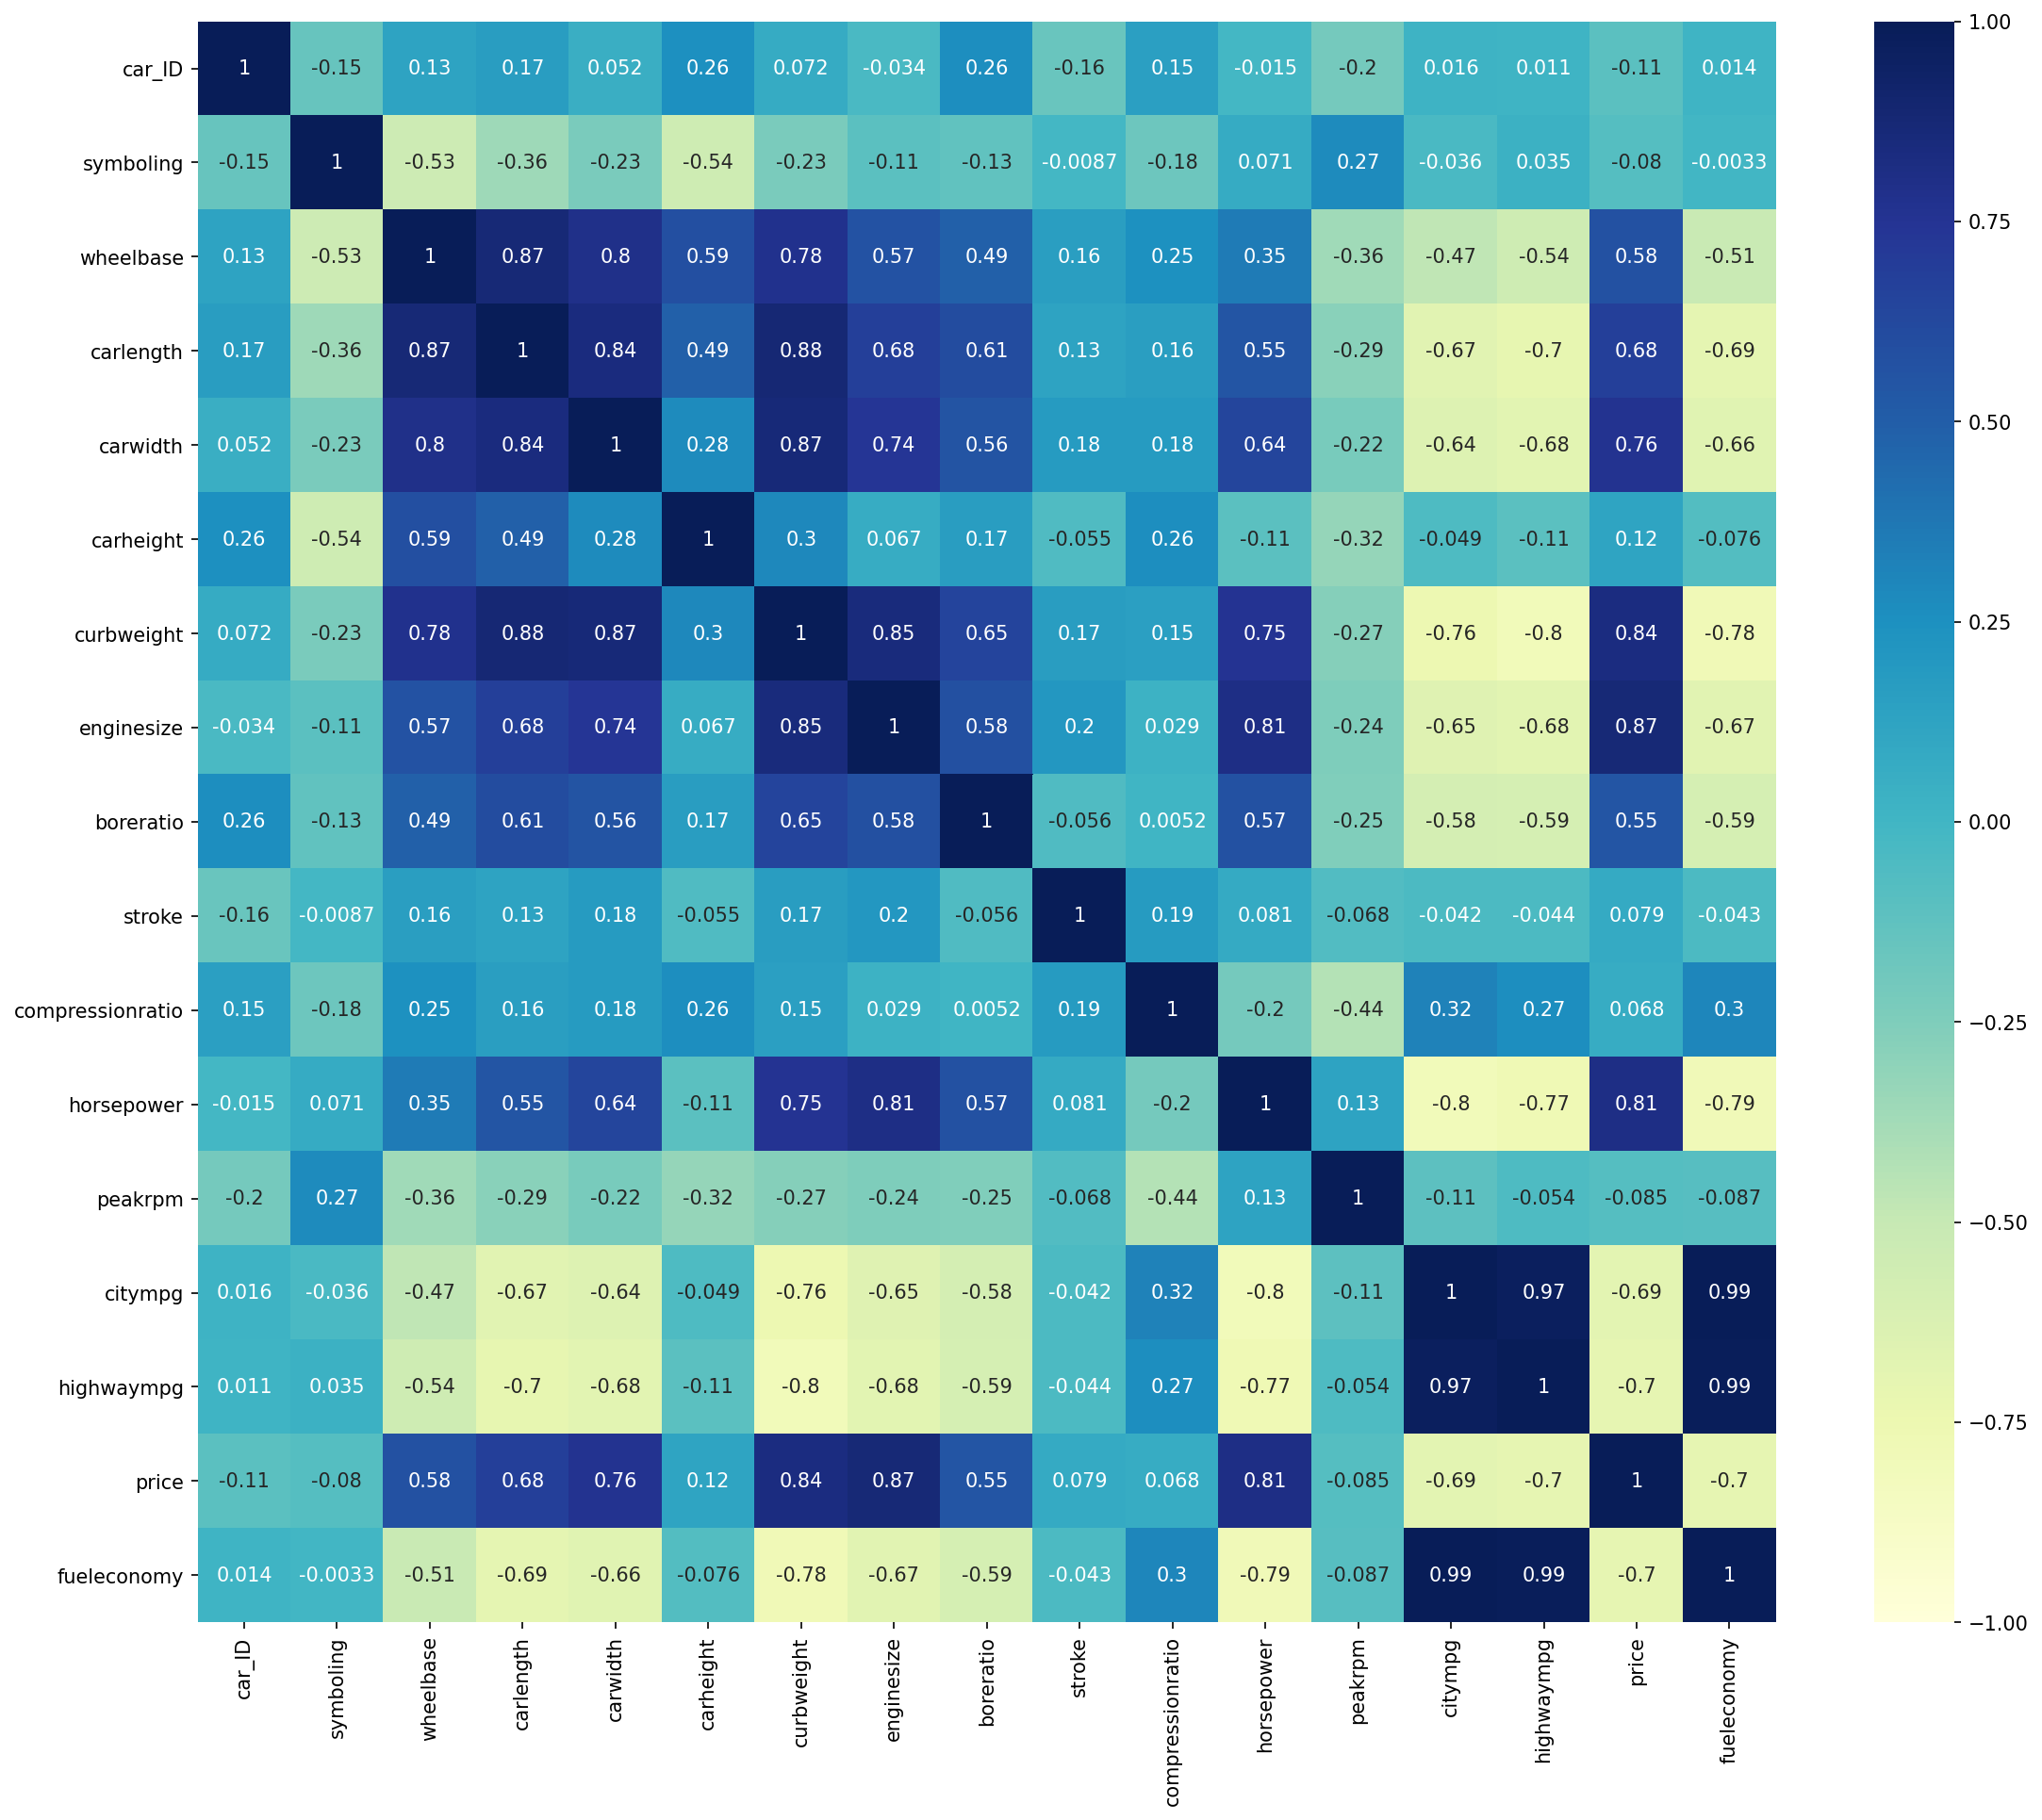

In [485]:
plt.figure(figsize=(18,15),dpi=150)
sns.heatmap(cars.corr(),annot=True,cmap='YlGnBu',vmax=1,vmin=-1)
plt.show()

In [486]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy', 'carsrange'],
      dtype='object')

List of significant variables after Visual analysis :
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [487]:
data = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
data.head()

price fueltype aspiration      carbody drivewheel  wheelbase  curbweight  \
0  13495      gas        std  convertible        rwd       88.6        2548   
1  16500      gas        std  convertible        rwd       88.6        2548   
2  16500      gas        std    hatchback        rwd       94.5        2823   
3  13950      gas        std        sedan        fwd       99.8        2337   
4  17450      gas        std        sedan        4wd       99.4        2824   

  enginetype cylindernumber  enginesize  boreratio  horsepower  fueleconomy  \
0       dohc           four         130       3.47         111        23.70   
1       dohc           four         130       3.47         111        23.70   
2       ohcv            six         152       2.68         154        22.15   
3        ohc           four         109       3.19         102        26.70   
4        ohc           five         136       3.19         115        19.80   

   carlength  carwidth carsrange  
0      168.8      64.1    Medium  
1      168.8      64.1    Medium  
2      171.2      65.5    Medium  
3      176.6      66.2    Medium  
4      176.6      66.4    Medium

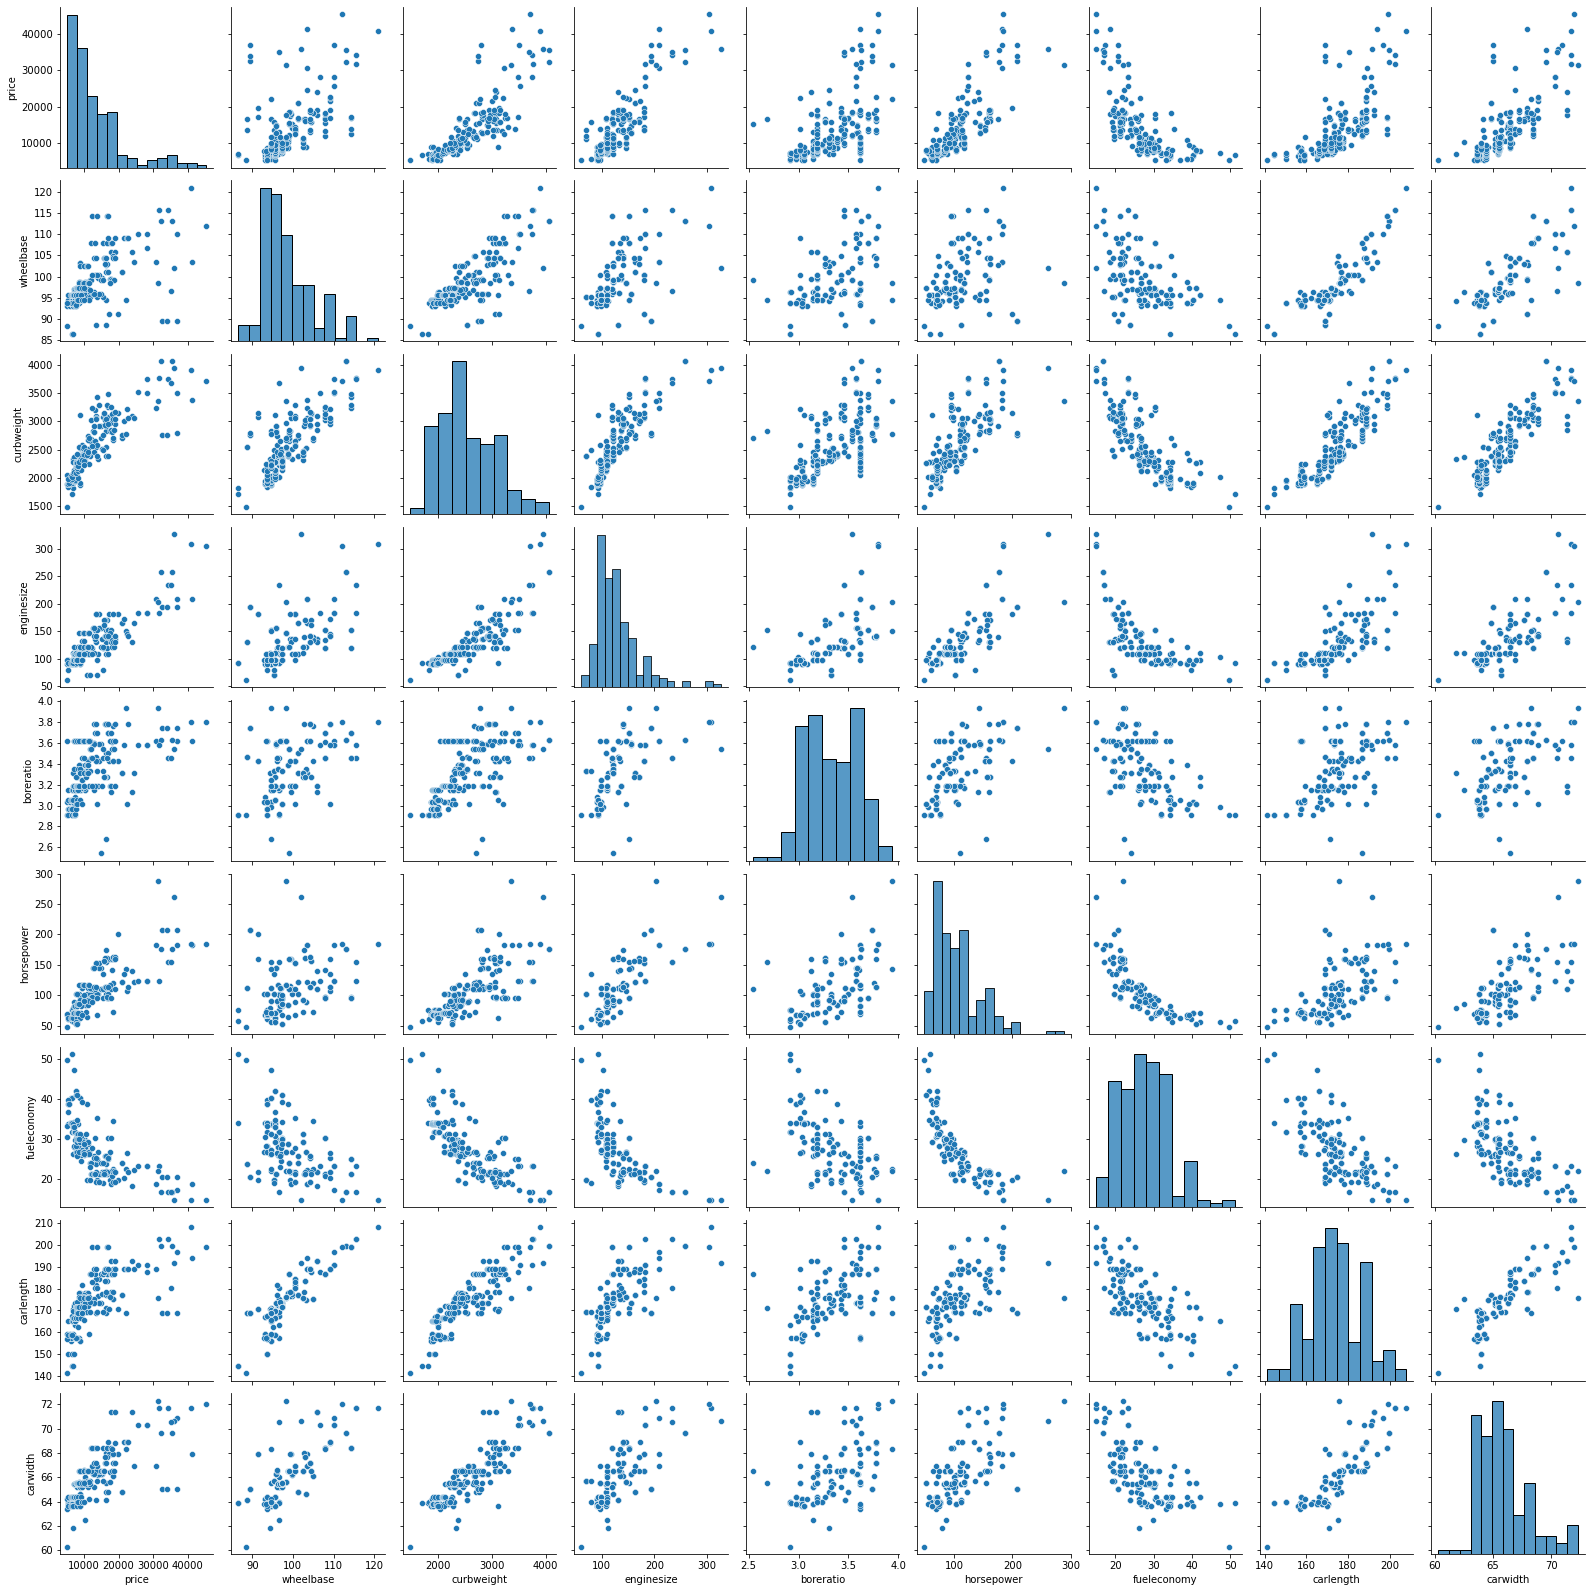

In [488]:
sns.pairplot(data)
plt.show()

In [489]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df


# Applying the function to the cars_lr

data = dummies('fueltype',data)
data = dummies('aspiration',data)
data = dummies('carbody',data)
data = dummies('drivewheel',data)
data = dummies('enginetype',data)
data = dummies('cylindernumber',data)
data = dummies('carsrange',data)

In [490]:
data.shape

(205, 31)

In [491]:
data.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
0  13495       88.6        2548         130       3.47         111   
1  16500       88.6        2548         130       3.47         111   
2  16500       94.5        2823         152       2.68         154   
3  13950       99.8        2337         109       3.19         102   
4  17450       99.4        2824         136       3.19         115   

   fueleconomy  carlength  carwidth  gas  turbo  hardtop  hatchback  sedan  \
0        23.70      168.8      64.1    1      0        0          0      0   
1        23.70      168.8      64.1    1      0        0          0      0   
2        22.15      171.2      65.5    1      0        0          1      0   
3        26.70      176.6      66.2    1      0        0          0      1   
4        19.80      176.6      66.4    1      0        0          0      1   

   wagon  fwd  rwd  dohcv  l  ohc  ohcf  ohcv  rotor  five  four  six  three  \
0      0    0    1      0  0    0     0     0      0     0     1    0      0   
1      0    0    1      0  0    0     0     0      0     0     1    0      0   
2      0    0    1      0  0    0     0     1      0     0     0    1      0   
3      0    1    0      0  0    1     0     0      0     0     1    0      0   
4      0    0    0      0  0    1     0     0      0     1     0    0      0   

   twelve  two  Medium  Highend  
0       0    0       1        0  
1       0    0       1        0  
2       0    0       1        0  
3       0    0       1        0  
4       0    0       1        0

In [492]:
type(data)

pandas.core.frame.DataFrame

## Model

In [493]:
data = sm.add_constant(data)
x=data.drop('price',axis=1)
y=data['price']

In [494]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=101)

In [495]:
print("The shape of X_train is:",xtrain.shape)
print("The shape of X_test is:",xtest.shape)
print("The shape of y_train is:",ytrain.shape)
print("The shape of y_test is:",ytest.shape)

The shape of X_train is: (143, 31)
The shape of X_test is: (62, 31)
The shape of y_train is: (143,)
The shape of y_test is: (62,)


In [496]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [497]:
#lm=LinearRegression()
#lm.fit(xtrain,ytrain)
#r=RFE(lm,10)
#rfe=r.fit(xtrain,ytrain)

In [498]:
#list(zip(xtrain.columns,rfe.support_,rfe.ranking_))

In [499]:
#xtrain.columns[rfe.support_]

In [500]:
#xtrain=xtrain[xtrain.columns[rfe.support_]]
#xtrain.head()

In [501]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#xtrain=scaler.fit_transform(xtrain)
#xtest=scaler.fit_transform(xtest)

In [502]:
model=sm.OLS(ytrain,xtrain).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           1.54e-69
Time:                        01:35:26   Log-Likelihood:                -1246.7
No. Observations:                 143   AIC:                             2551.
Df Residuals:                     114   BIC:                             2637.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.828e+04   1.15e+04     -3.337      

In [503]:
`

SyntaxError: invalid syntax (<ipython-input-503-f6460d7d9d2b>, line 1)